# <font color='#FFE15D'>**Week 11: Logistic Regression 🔴🔵**</font>

## **🔸 Multiclass Classification (sklearn)**

Note: Multinomial Logit ~ Soft Max

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from mlxtend.plotting import plot_decision_regions

In [3]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X[:, [0, 3]], y, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 2), (120,), (30, 2), (30,))

0.8333333333333334


d:\venv\venv_general_312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


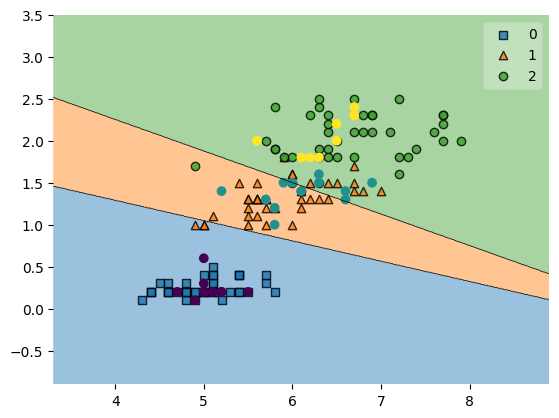

In [5]:
model = LogisticRegression(multi_class="ovr", random_state=25)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

plot_decision_regions(x_train, y_train, clf=model)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

0.9666666666666667


d:\venv\venv_general_312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


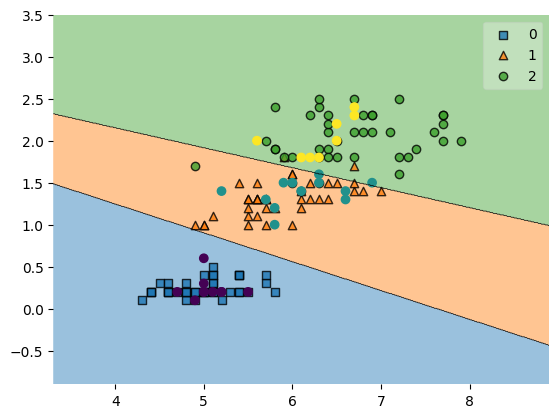

In [6]:
model = LogisticRegression(multi_class="multinomial", random_state=25)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

plot_decision_regions(x_train, y_train, clf=model)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

0.9666666666666667


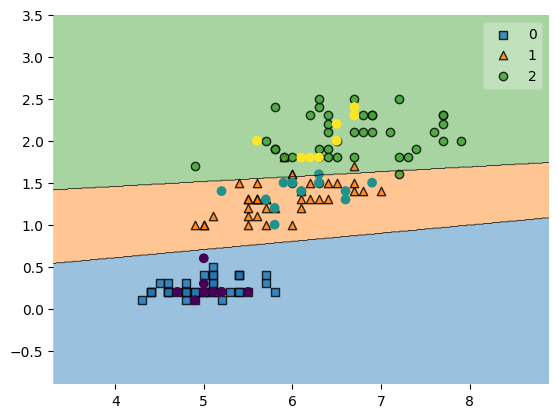

In [7]:
model = SGDClassifier(random_state=25)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

plot_decision_regions(x_train, y_train, clf=model)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

0.6333333333333333


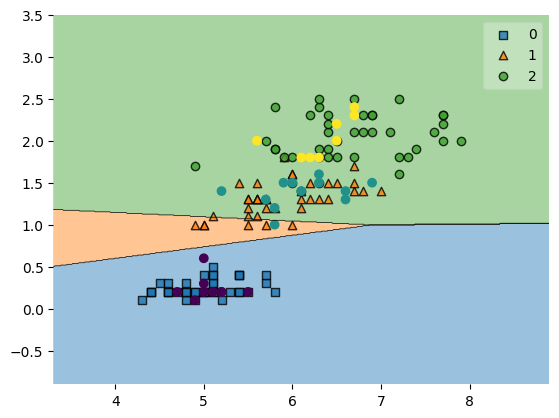

In [8]:
# Bad config
model = SGDClassifier(loss="log_loss", penalty="elasticnet", random_state=25)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

plot_decision_regions(x_train, y_train, clf=model)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

0.8333333333333334


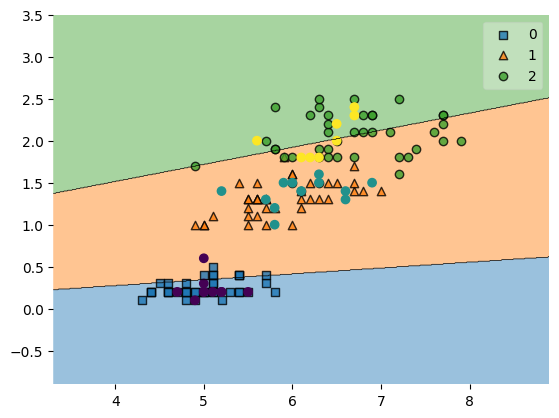

In [9]:
# normal config
model = SGDClassifier(loss="log_loss", penalty=None, random_state=25)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

plot_decision_regions(x_train, y_train, clf=model)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

0.9333333333333333


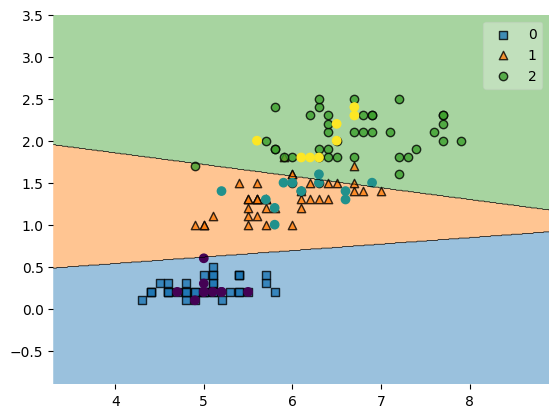

In [10]:
# my best config
model = SGDClassifier(loss="log_loss", penalty=None,max_iter=500000,early_stopping=False,n_iter_no_change=1000, random_state=25)
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

plot_decision_regions(x_train, y_train, clf=model)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)